## Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import History, TensorBoard

import sklearn
from sklearn.model_selection import train_test_split  # для случайной выборки валидации
%matplotlib inline

In [2]:
import PIL
from PIL import Image

# Lection_balakirev

## Загрузка БД и просмотр

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape  #(60000, 28, 28)

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Получили 60_000 изображений, с размером 28 * 28

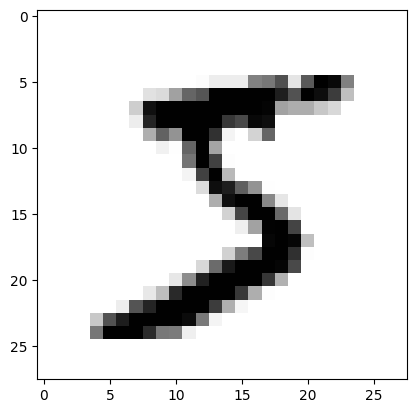

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary);

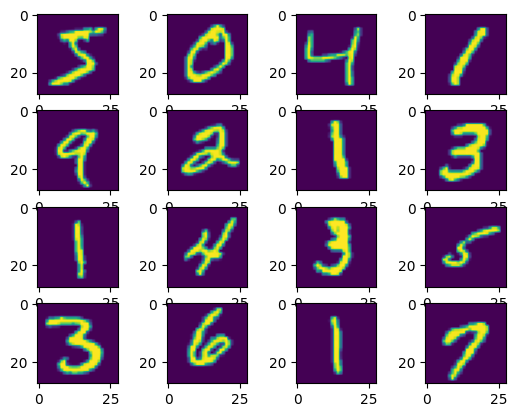

In [7]:
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i])
plt.show()


## Стандартизация входных данных

нужно чтобы входные значения были в диапозоне от 0 до 1, делим каждое значение на максимальное 255 (кол-во байт в одном пикселе серого цвета)

In [8]:
x_train = x_train / 255
x_test = x_test / 255
print(x_test.shape)

(10000, 28, 28)


## Преобразование выходных значений в векторы по категориям
Поскольку выходные значения у нас будут в виде вектора, например,
[0,0,1,0,0,0,0,0,0,0] что соответствует цифре 2. То в керасе есть функция, которая приводит в вектор в конкертное значение - utils

In [9]:
print(y_train.shape)
print(y_train[0])

(60000,)
5


In [10]:
y_train_cat = keras.utils.to_categorical(y_train, 10)  # преобразуем значения в векторы
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [11]:
# @title Выборка для BatchNormalization
limit = 5_000

In [12]:
print(y_train_cat.shape)
print(y_train_cat[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# @title Формирование выборки валидации вручную
val_size = 10_000  # всего выборка обучающая 60_000
# выборка валидации:
x_val_split = x_train[:limit]  # берём первые ... тыс наблюдений
y_val_split = y_train_cat[:limit]

# выборка обучающая
x_train_split = x_train[:val_size]
y_train_split = y_train_cat[:val_size]

# в обучении сети указываем кортеж из данных валидации (x, y)

In [14]:
# @title Выборка валидации через sklearn
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train_cat, test_size=0.2)


## Создаём архитектуру НС

In [15]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    # BatchNormalization(),  # для примера, обычно применяется при большом кол-ве слоёв
    Dense(10, activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Получили 100_480 связей между входным и скрытым слоями = (784 + 1) * 128

(128 + 1) * 10 = 1290 между скрытым и выходным слоями

## Compile (loss, optimizers)

Когда мы компилируем НС, то Выбираем функцию потерь и опимизации градиентного алгоритма:
* Для функции потерь в классификации для более двух категорий исп-ем  - **_категоральную кроссэнтропию_**
* Для оптимизации градиента - Адам, SGD, RMSprop
* метрика 'accuracy' - покажет нам процент вероятности результата

In [16]:
# @title ### Создаём оптимизаторы
# Для оптимизации алгоритма градиентного спуска настроим их вручную:
myAdam = keras.optimizers.Adam(learning_rate=0.001)
mySGD = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, nesterov=True)

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Запуск процесса обучения
атрибуты:
* входная выборка
* требуемый отклик в виде вектора
* batch_size (каждый батч 32 изображения), после каждого батча корректируются весовые коэффициент)
* колво эпох - 5
* validation_split делит обучающую выборку на обучающую и проверочную (обычно от 10 до 30), сделали 80/20

In [18]:
history = model.fit(x_train_split, y_train_split, batch_size=32, epochs=5, validation_data=(x_val_split, y_val_split))

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2398 - accuracy: 0.9316 - val_loss: 0.1397 - val_accuracy: 0.9575
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0988 - accuracy: 0.9708 - val_loss: 0.1030 - val_accuracy: 0.9668
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0651 - accuracy: 0.9805 - val_loss: 0.0866 - val_accuracy: 0.9735
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0795 - val_accuracy: 0.9763
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0755 - val_accuracy: 0.9762


## History ГРАФИК
Просмотр истории качества сети на обуч и валид выборках

In [19]:
# @title Смотрим какие есть ключи у этого словаря
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
# @title Посмотрим данные на обучающей выборке:
print(history.history['accuracy'])

[0.9316041469573975, 0.9707708358764648, 0.9805208444595337, 0.9862499833106995, 0.9900000095367432]


In [21]:
# @title Посмотрим данные на выборке валидации:
print(history.history['val_accuracy'])

[0.9574999809265137, 0.9668333530426025, 0.9735000133514404, 0.9763333201408386, 0.9762499928474426]


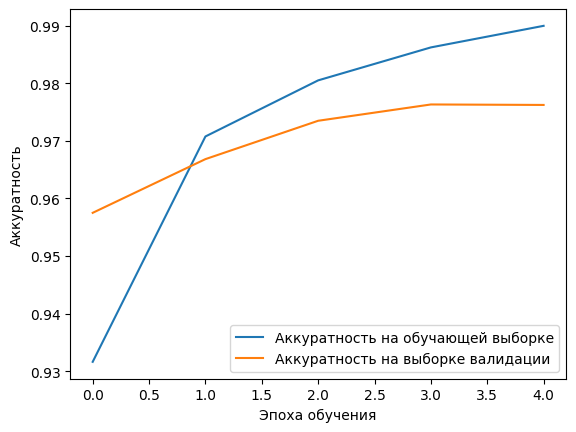

In [22]:
# @title Посмотрим АККУРАТНОСТЬ на графике:
plt.plot(history.history['accuracy'], label='Аккуратность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Аккуратность на выборке валидации')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

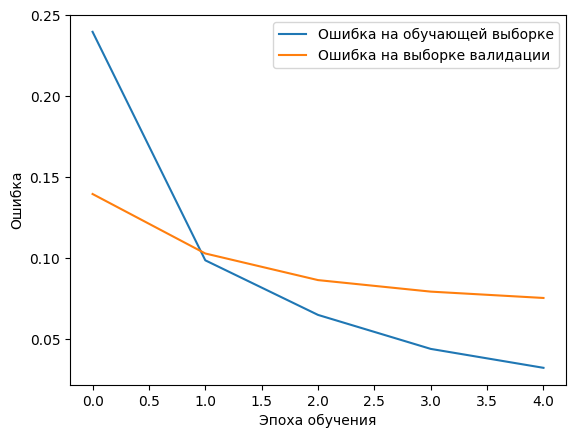

In [23]:
# @title Посмотрим ОШИБКУ на графике:
plt.plot(history.history['loss'], label='Ошибка на обучающей выборке')
plt.plot(history.history['val_loss'], label='Ошибка на выборке валидации')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [24]:
# @title Прогоняем тестовую выборку
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0685 - accuracy: 0.9786


[0.06847020238637924, 0.978600025177002]

## Проверка распознавания цифр

In [25]:
print(x_test.shape)

(10000, 28, 28)


1/1 [==============================] - 0s 64ms/step
[[2.4823435e-10 1.1144311e-09 1.1314111e-09 4.1116900e-06 3.1597685e-12
  9.9999595e-01 3.2036624e-08 1.6636842e-12 2.4982041e-09 1.8421350e-08]]
Распознанная цифра: 5


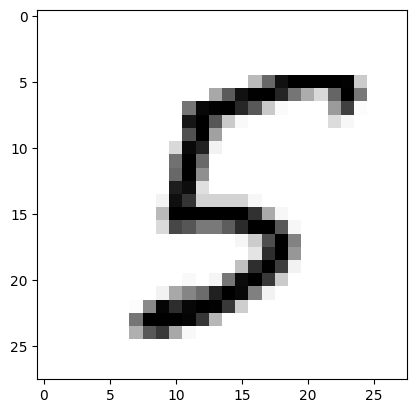

In [26]:
n = 23  # номер индекса
# x_test[n] - это двумерная матрица, на вход предикт подавать нельзя, добавляем ось со значением 0 (axis=0):
x = np.expand_dims(x_test[n], axis=0)

res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [27]:
# @title Распознавание всей тестовой выборки
pred = model.predict(x_test)  # выведет рез-ты в векторах
pred = np.argmax(pred, axis=1)  # выведет рез-ты в цифрах (axis=1 поскольку мы выводим всю тест выборку, а нам нужны вектора, т.e. массив внутри)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 1ms/step
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [28]:
# @title Неверные результаты сети: статиcтика
mask = pred == y_test  # сравниваем вектора по всей тестовой выборке, а маск выводит true/false
print(mask[:5])  # [ True  True  True  True  True]

x_false = x_test[~mask]
p_false = pred[~mask]  # выведет вектора со значением false
print(x_false.shape)  # (210, 28, 28)

[ True  True  True  True  True]
(214, 28, 28)


Значение сети:  9


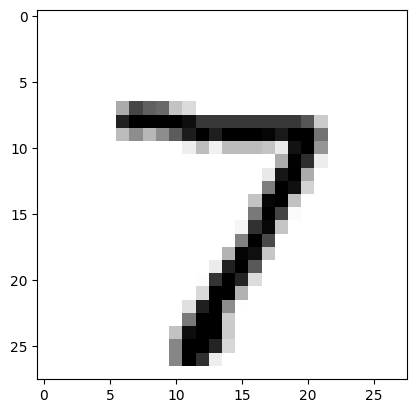

Значение сети:  8


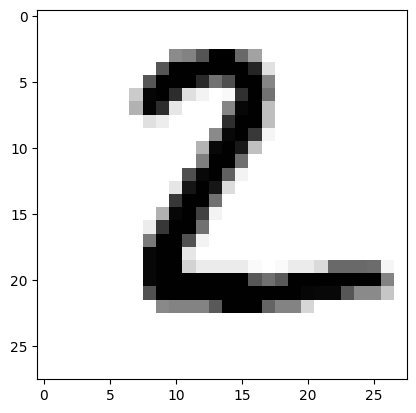

Значение сети:  2


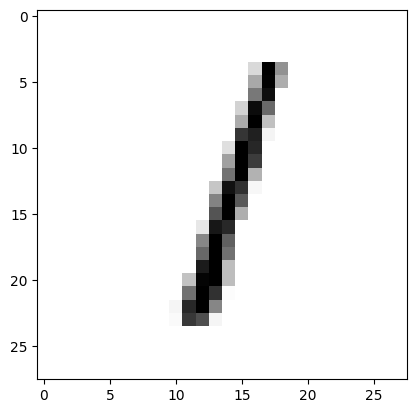

Значение сети:  7


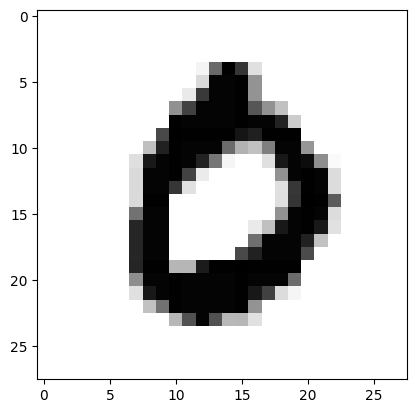

In [29]:
# @title  изображения с неверными результатами
for i in range(4):
  print('Значение сети: ', p_false[i])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.show()

# ДОМАШНЕЕ ЗАДАНИЕ

In [ ]:
# @title Загрузка изображений
seven = Image.open("/content/drive/MyDrive/Learning/NC/Seven.png")
four = Image.open('/content/drive/MyDrive/Learning/NC/four.png')
print(seven.size, seven.mode)

(648, 648) RGBA


In [ ]:
# @title Форматирование изображений
svn = seven.resize((28,28))  # меняем размер пикселей
sev = svn.convert(mode='P')  # меняем цвет RGBA на оттенки серого
four_ = four.resize((28,28))
fr = four_.convert(mode='P')

1/1 [==============================] - 0s 35ms/step
Распознанная цифра: 3


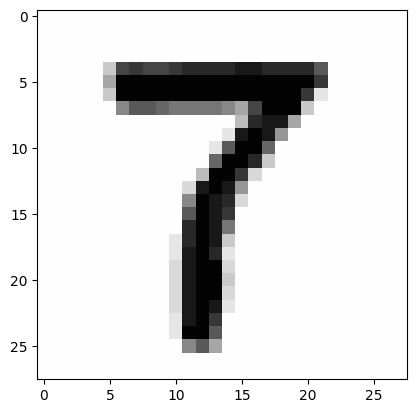

In [ ]:
# @title Распознавание 7
x = np.expand_dims(sev, axis=0)
res = model.predict(x)
print(f'Распознанная цифра: {np.argmax(res)}')
plt.imshow(sev);

1/1 [==============================] - 0s 14ms/step
Распознанная цифра: 4


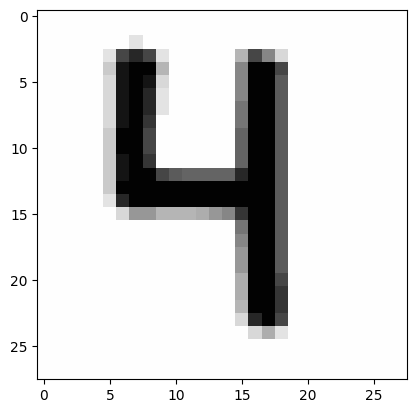

In [ ]:
# @title Распознавание 4
f = np.expand_dims(fr, axis=0)
f_res = model.predict(f)
print(f'Распознанная цифра: {np.argmax(f_res)}')
plt.imshow(fr);